In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np
import pandas as pd

sns.set_context("talk")
sns.set_style("white")

plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

In [2]:
# 데이터 불러오기

df = pd.read_csv("./data/한국에너지기술연구원_신재생자원지도데이터_태양자원_천리안1호_수평면전일사량_20191231.csv", 
                 encoding="euc-kr")  # 한글 인코딩
df.to_pickle("./data/KIER.pkl")      # 백업
df.head()

,위도,경도,2012-01 (kWh per m2 per day),2012-02 (kWh per m2 per day),2012-03 (kWh per m2 per day),2012-04 (kWh per m2 per day),2012-05 (kWh per m2 per day),2012-06 (kWh per m2 per day),2012-07 (kWh per m2 per day),2012-08 (kWh per m2 per day),...,2019-03 (kWh per m2 per day),2019-04 (kWh per m2 per day),2019-05 (kWh per m2 per day),2019-06 (kWh per m2 per day),2019-07 (kWh per m2 per day),2019-08 (kWh per m2 per day),2019-09 (kWh per m2 per day),2019-10 (kWh per m2 per day),2019-11 (kWh per m2 per day),2019-12 (kWh per m2 per day)
0,40.0019,124.6159,2.0730,2.1828,3.2823,4.0484,5.2845,3.9832,2.9512,3.9924,...,3.9006,4.7777,5.4403,4.6555,4.7166,4.9219,4.1817,3.0101,2.1359,1.5356
1,40.0018,124.6281,2.0789,2.1632,3.2432,4.0344,5.2823,3.9687,2.9507,3.9674,...,3.8768,4.7588,5.4591,4.6532,4.7569,4.9477,4.1713,3.0020,2.1378,1.5360
2,40.0017,124.6404,2.0972,2.2131,3.2442,4.0316,5.3024,3.9441,2.9116,3.8965,...,3.8693,4.7594,5.4680,4.6383,4.7369,4.9640,4.2167,3.0077,2.1599,1.5823
3,40.0016,124.6527,2.1196,2.2705,3.2478,4.0509,5.3398,3.9264,2.8856,3.8575,...,3.8866,4.8045,5.5022,4.6527,4.6534,4.9319,4.2364,3.0398,2.2024,1.6519
4,40.0015,124.6649,2.1441,2.3587,3.2618,4.0503,5.3560,3.9046,2.9386,3.8149,...,3.9155,4.8061,5.4708,4.6157,4.5886,4.9372,4.2518,3.0353,2.1929,1.6500


In [172]:
df.shape

(291924, 98)

In [173]:
# 광주광역시 위경도 : 35.1595° N, 126.8526° E
idx = np.argmin(np.power(df["lon"]-35.1595, 2) + np.power(df["lat"]-126.8526, 2))
df.iloc[idx]

lon         35.1589
lat        126.8488
2012-01      2.1935
2012-02      2.4843
2012-03      3.5342
             ...   
2019-08      4.7458
2019-09      3.4491
2019-10      3.3695
2019-11      2.6855
2019-12      2.1593
Name: 170922, Length: 98, dtype: float64

In [100]:
months = list(df.columns)[2:]
irrs = df.iloc[idx][2:]

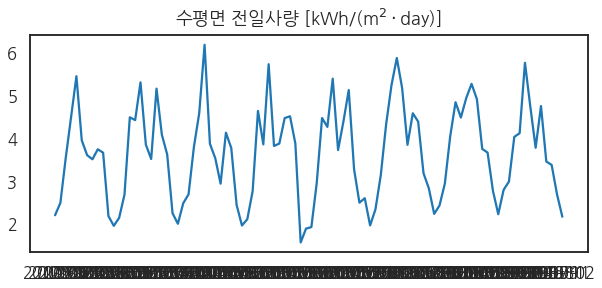

In [174]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(months, irrs)
ax.set_title("수평면 전일사량 [kWh/(m$^2 \cdot$day)]", pad=10)

fig.savefig("88_gpd_mpl_15.png")

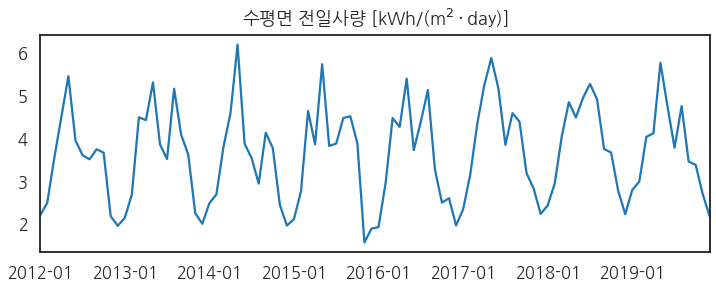

In [132]:
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(months, irrs)
ax.set_title("수평면 전일사량 [kWh/(m$^2 \cdot$day)]", pad=10)
ax.set_xlim(0, len(months)-1)

ax.xaxis.set_major_locator(MultipleLocator(12))

fig.savefig("88_gpd_mpl_16.png")

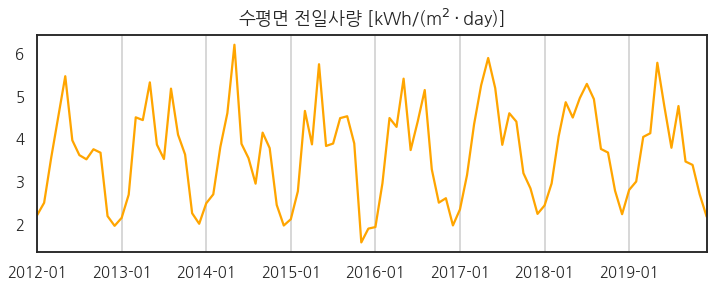

In [183]:
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(months, irrs, c="orange")
ax.set_title("수평면 전일사량 [kWh/(m$^2 \cdot$day)]", pad=10)
ax.set_xlim(0, len(months)-1)

ax.xaxis.set_major_locator(MultipleLocator(12))
ax.tick_params(axis="both", labelsize="small")
ax.grid(axis="x")

fig.savefig("88_gpd_mpl_17.png")

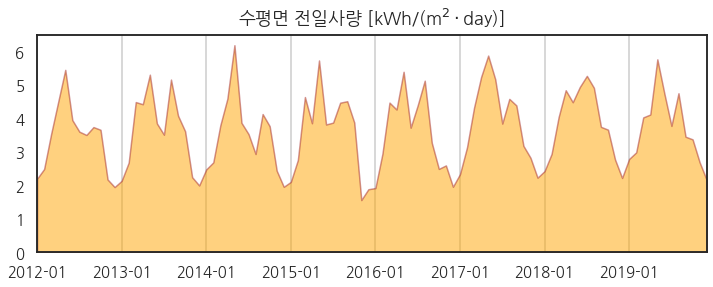

In [184]:
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(figsize=(12, 4))
ax.stackplot(months, irrs, colors="orange", ec="brown", alpha=0.5)
ax.set_title("수평면 전일사량 [kWh/(m$^2 \cdot$day)]", pad=10)
ax.set_xlim(0, len(months)-1)

ax.xaxis.set_major_locator(MultipleLocator(12))
ax.tick_params(axis="both", labelsize="small")
ax.grid(axis="x")

fig.savefig("88_gpd_mpl_21.png")

In [3]:
# column 이름 변경

cols = list(df.columns)
cols_short = ["lon", "lat"] + [c.split(" ")[0] for c in cols[2:]]
df.columns = cols_short
df.head()

,lon,lat,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,40.0019,124.6159,2.0730,2.1828,3.2823,4.0484,5.2845,3.9832,2.9512,3.9924,...,3.9006,4.7777,5.4403,4.6555,4.7166,4.9219,4.1817,3.0101,2.1359,1.5356
1,40.0018,124.6281,2.0789,2.1632,3.2432,4.0344,5.2823,3.9687,2.9507,3.9674,...,3.8768,4.7588,5.4591,4.6532,4.7569,4.9477,4.1713,3.0020,2.1378,1.5360
2,40.0017,124.6404,2.0972,2.2131,3.2442,4.0316,5.3024,3.9441,2.9116,3.8965,...,3.8693,4.7594,5.4680,4.6383,4.7369,4.9640,4.2167,3.0077,2.1599,1.5823
3,40.0016,124.6527,2.1196,2.2705,3.2478,4.0509,5.3398,3.9264,2.8856,3.8575,...,3.8866,4.8045,5.5022,4.6527,4.6534,4.9319,4.2364,3.0398,2.2024,1.6519
4,40.0015,124.6649,2.1441,2.3587,3.2618,4.0503,5.3560,3.9046,2.9386,3.8149,...,3.9155,4.8061,5.4708,4.6157,4.5886,4.9372,4.2518,3.0353,2.1929,1.6500


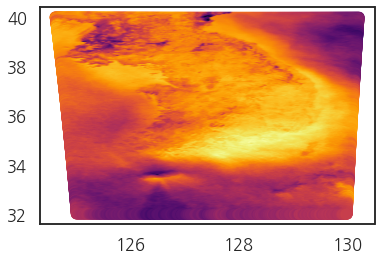

In [4]:
# 시각화 1
fig, ax = plt.subplots()
ax.scatter(df["lat"], df["lon"], c=df["2012-01"], cmap="inferno")

fig.savefig("88_gpd_mpl_01.png")

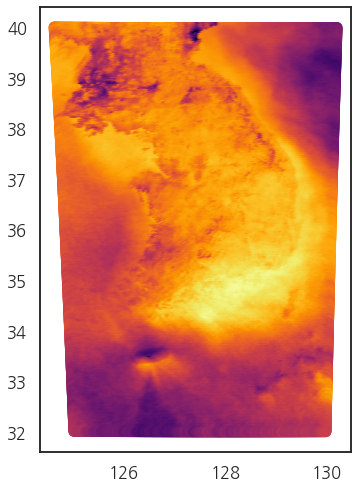

In [5]:
fig, ax = plt.subplots(figsize=(5, 6.67), constrained_layout=True)
ax.scatter(df["lat"], df["lon"], c=df["2012-01"], cmap="inferno")
ax.set_aspect("equal")

fig.savefig("88_gpd_mpl_02.png")

In [18]:
# 좌표 변환: WGS1984 to UTM-K
from pyproj import Transformer

transformer = Transformer.from_crs("epsg:4326", "epsg:5178")
coord_UTMK = transformer.transform(df["lon"], df["lat"])
coord_UTMK

(array([2225831.32333185, 2225786.57810011, 2225741.70188975, ...,
        1336660.1522506 , 1336683.81091998, 1336718.66261087]),
 array([ 753985.81806709,  755027.06130674,  756076.84336226, ...,
        1234044.28489723, 1235074.31039001, 1236104.08325474]))

In [21]:
# 변환된 좌표계로 데이터프레임 생성
df_u = pd.DataFrame(data=np.array(coord_UTMK).T, columns=["y", "x"])
df_u = pd.concat([df_u, df.iloc[:, 2:]], axis=1)
df_u.head()

,y,x,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,2.225831e+06,753985.818067,2.0730,2.1828,3.2823,4.0484,5.2845,3.9832,2.9512,3.9924,...,3.9006,4.7777,5.4403,4.6555,4.7166,4.9219,4.1817,3.0101,2.1359,1.5356
1,2.225787e+06,755027.061307,2.0789,2.1632,3.2432,4.0344,5.2823,3.9687,2.9507,3.9674,...,3.8768,4.7588,5.4591,4.6532,4.7569,4.9477,4.1713,3.0020,2.1378,1.5360
2,2.225742e+06,756076.843362,2.0972,2.2131,3.2442,4.0316,5.3024,3.9441,2.9116,3.8965,...,3.8693,4.7594,5.4680,4.6383,4.7369,4.9640,4.2167,3.0077,2.1599,1.5823
3,2.225697e+06,757126.626520,2.1196,2.2705,3.2478,4.0509,5.3398,3.9264,2.8856,3.8575,...,3.8866,4.8045,5.5022,4.6527,4.6534,4.9319,4.2364,3.0398,2.2024,1.6519
4,2.225653e+06,758167.873081,2.1441,2.3587,3.2618,4.0503,5.3560,3.9046,2.9386,3.8149,...,3.9155,4.8061,5.4708,4.6157,4.5886,4.9372,4.2518,3.0353,2.1929,1.6500


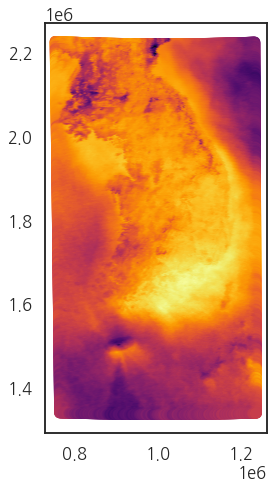

In [30]:
fig, ax = plt.subplots(figsize=(5, 6.67), constrained_layout=True)
ax.scatter(df_u["x"], df_u["y"], c=df_u["2012-01"], cmap="inferno")
ax.set_aspect("equal")

fig.savefig("88_gpd_mpl_03.png")

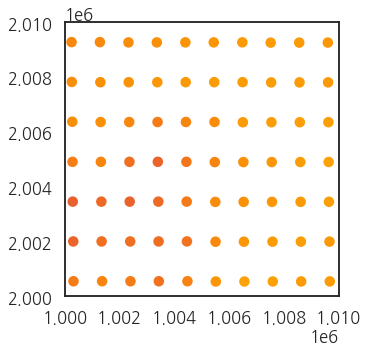

In [209]:
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
ax.scatter(df_u["x"], df_u["y"], c=df_u["2012-01"], cmap="inferno")
ax.set_aspect("equal")
ax.set_xlim(1e6, 1e6+10000)
ax.set_ylim(2e6, 2e6+10000)

fig.savefig("88_gpd_mpl_04.png")

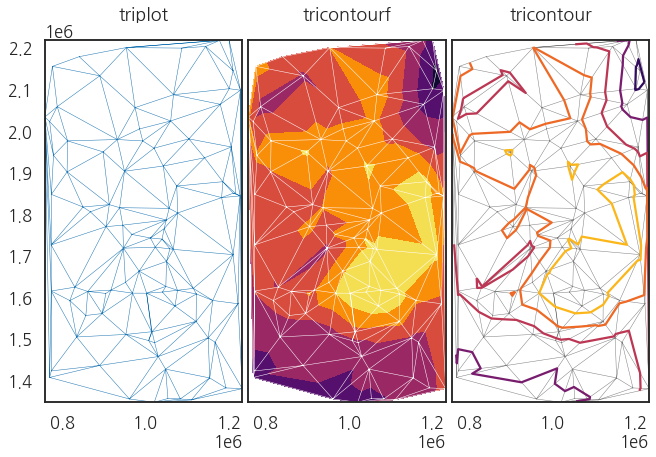

In [56]:
# sampling
df_us = df_u.sample(100)

# visualize
fig, axs = plt.subplots(ncols=3, figsize=(9, 6.67), sharex=True, sharey=True, constrained_layout=True)
axs[0].triplot(df_us["x"], df_us["y"], lw=0.5)
axs[1].triplot(df_us["x"], df_us["y"], lw=0.5, c="w")
axs[2].triplot(df_us["x"], df_us["y"], lw=0.5, c="k", alpha=0.5)

axs[1].tricontourf(df_us["x"], df_us["y"], df_us["2012-01"], cmap="inferno", levels=5)
axs[2].tricontour(df_us["x"], df_us["y"], df_us["2012-01"], cmap="inferno", levels=5)

for ax, title in zip(axs, ["triplot", "tricontourf", "tricontour"]):
    ax.set_aspect("equal")
    ax.set_title(title, pad=20)

fig.savefig("88_gpd_mpl_05.png")

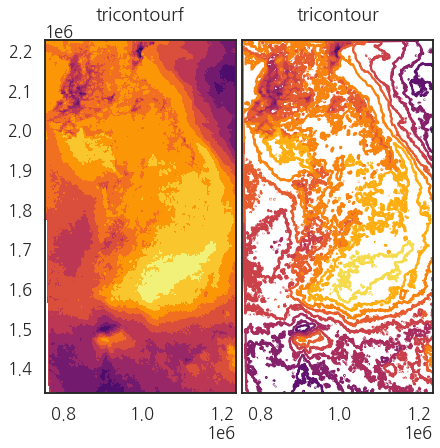

In [61]:
# visualize
fig, axs = plt.subplots(ncols=2, figsize=(6, 6.67), sharex=True, sharey=True, constrained_layout=True)

axs[0].tricontourf(df_u["x"], df_u["y"], df_u["2012-01"], cmap="inferno", levels=10)
axs[1].tricontour(df_u["x"], df_u["y"], df_u["2012-01"], cmap="inferno", levels=10)

for ax, title in zip(axs, ["tricontourf", "tricontour"]):
    ax.set_aspect("equal")
    ax.set_title(title, pad=20)

fig.savefig("88_gpd_mpl_06.png")

In [62]:
# map boundary

import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [63]:
world.head(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


In [64]:
cities.head(3)

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)


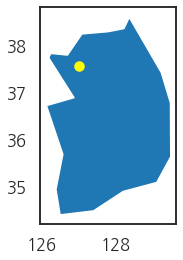

In [67]:
fig, ax = plt.subplots()
world[world["name"] == "South Korea"].plot(ax=ax)
cities[cities["name"]=="Seoul"].plot(ax=ax, c="yellow")

fig.savefig("88_gpd_mpl_07.png")

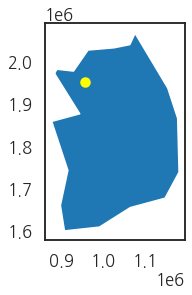

In [68]:
world = world.to_crs("EPSG:5178")
cities = cities.to_crs("EPSG:5178")

fig, ax = plt.subplots()
world[world["name"] == "South Korea"].plot(ax=ax)
cities[cities["name"]=="Seoul"].plot(ax=ax, c="yellow")

fig.savefig("88_gpd_mpl_08.png")

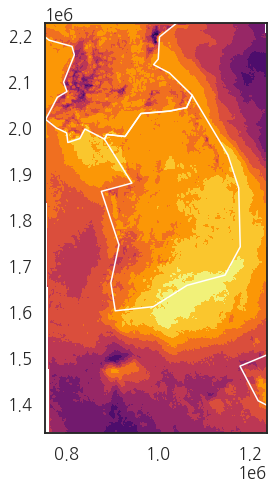

In [210]:
# visualize
fig, ax = plt.subplots(figsize=(5, 6.67), constrained_layout=True)

ax.tricontourf(df_u["x"], df_u["y"], df_u["2012-01"], cmap="inferno", levels=10)
ax.set_aspect("equal")

world[world["name"] == "South Korea"].plot(ax=ax, fc="none", ec="w")
world[world["name"] == "North Korea"].plot(ax=ax, fc="none", ec="w")
world[world["name"] == "Japan"].plot(ax=ax, fc="none", ec="w")

ax.set_xlim(df_u["x"].min(), df_u["x"].max())
ax.set_ylim(df_u["y"].min(), df_u["y"].max())

fig.savefig("88_gpd_mpl_09.png")

In [211]:
# 시도 경계

df_shp = gpd.read_file("./CTPRVN_202101/TL_SCCO_CTPRVN.shp", encoding="euc-kr")
df_shp.head(3)

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
0,42,Gangwon-do,강원도,"MULTIPOLYGON (((1163759.191 1909653.101, 11637..."
1,41,Gyeonggi-do,경기도,"MULTIPOLYGON (((931607.470 1894480.382, 931653..."
2,48,Gyeongsangnam-do,경상남도,"MULTIPOLYGON (((1053643.218 1612344.022, 10536..."


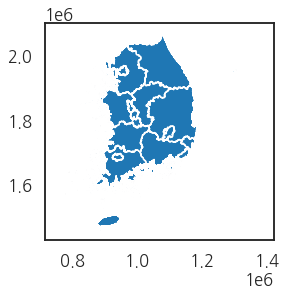

In [73]:
ax = df_shp.plot()
fig = ax.figure

fig.savefig("88_gpd_mpl_10.png")

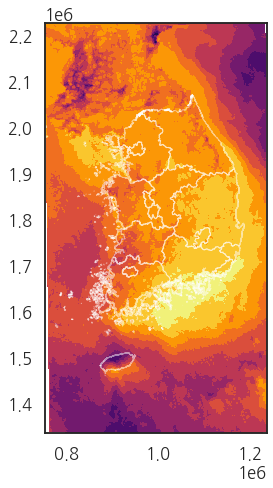

In [212]:
# visualize
fig, ax = plt.subplots(figsize=(5, 6.67), constrained_layout=True)

ax.tricontourf(df_u["x"], df_u["y"], df_u["2012-01"], cmap="inferno", levels=10)
ax.set_aspect("equal")

df_shp.plot(ax=ax, fc="none", ec="w", lw=1, alpha=0.5)

ax.set_xlim(df_u["x"].min(), df_u["x"].max())
ax.set_ylim(df_u["y"].min(), df_u["y"].max())

fig.savefig("88_gpd_mpl_11.png")

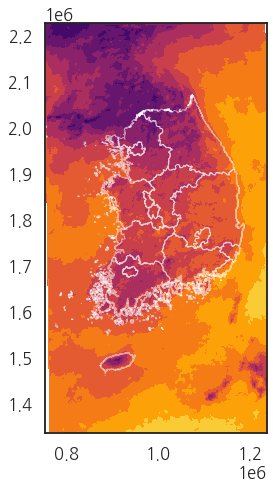

In [77]:
# visualize
fig, ax = plt.subplots(figsize=(5, 6.67), constrained_layout=True)

ax.tricontourf(df_u["x"], df_u["y"], df_u["2012-07"], cmap="inferno", levels=10)
ax.set_aspect("equal")

df_shp.plot(ax=ax, fc="none", ec="w", lw=1, alpha=0.5)

ax.set_xlim(df_u["x"].min(), df_u["x"].max())
ax.set_ylim(df_u["y"].min(), df_u["y"].max())

fig.savefig("88_gpd_mpl_12.png")

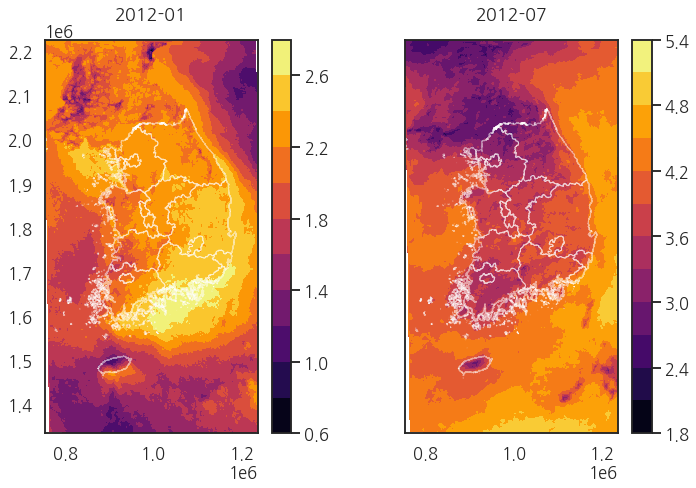

In [214]:
# visualize
fig, axs = plt.subplots(ncols=2, figsize=(10, 6.67), constrained_layout=True, sharex=True, sharey=True)

for ax, month in zip(axs, ["2012-01", "2012-07"]):
    df_shp.plot(ax=ax, fc="none", ec="w", lw=1, alpha=0.5, zorder=2)
    im = ax.tricontourf(df_u["x"], df_u["y"], df_u[month], cmap="inferno", levels=10)
    ax.set_aspect("equal")
    ax.set_title(month, pad=20)
    ax.set_xlim(df_u["x"].min(), df_u["x"].max())
    ax.set_ylim(df_u["y"].min(), df_u["y"].max())

    plt.colorbar(im, ax=ax)

fig.savefig("88_gpd_mpl_13.png")

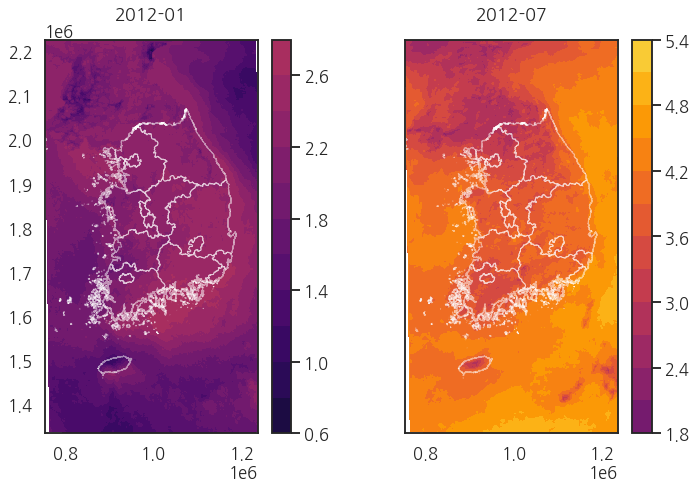

In [142]:
# visualize
fig, axs = plt.subplots(ncols=2, figsize=(10, 6.67), constrained_layout=True, sharex=True, sharey=True)

for ax, month in zip(axs, ["2012-01", "2012-07"]):
    df_shp.plot(ax=ax, fc="none", ec="w", lw=1, alpha=0.5, zorder=2)
    im = ax.tricontourf(df_u["x"], df_u["y"], df_u[month], cmap="inferno", levels=10, vmin=0, vmax=6)
    ax.set_aspect("equal")
    ax.set_title(month, pad=20)
    ax.set_xlim(df_u["x"].min(), df_u["x"].max())
    ax.set_ylim(df_u["y"].min(), df_u["y"].max())

    plt.colorbar(im, ax=ax)

fig.savefig("88_gpd_mpl_14.png")

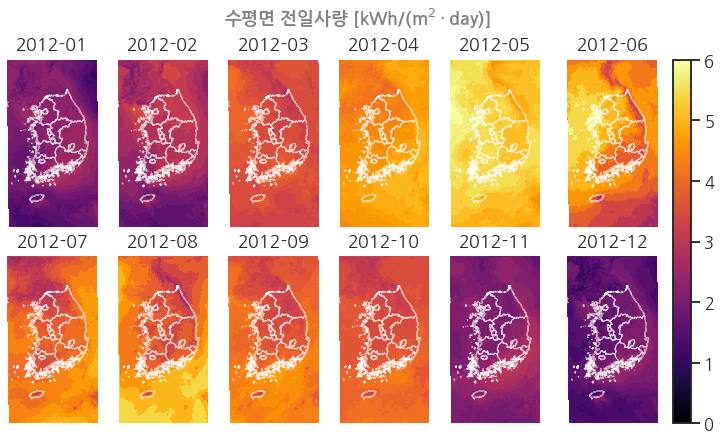

In [175]:
from matplotlib import cm

fig, axes = plt.subplots(ncols=6, nrows=2, figsize=(10, 6), constrained_layout=True, sharex=True, sharey=True)

axs = axes.ravel()
for i, ax in enumerate(axs, 1):
    month = f"2012-{i:02d}"
    df_shp.plot(ax=ax, fc="none", ec="w", lw=1, alpha=0.5, zorder=2)
    im = ax.tricontourf(df_u["x"], df_u["y"], df_u[month], cmap="inferno", levels=10, vmin=0, vmax=6)
    ax.set_aspect("equal")
    ax.set_title(month, pad=10)
    ax.set_xlim(df_u["x"].min(), df_u["x"].max())
    ax.set_ylim(df_u["y"].min(), df_u["y"].max())
    ax.axis(False)

# colorbar
cbar = cm.ScalarMappable(cmap="inferno")
cbar.set_clim(0, 6)
plt.colorbar(cbar, ax=axes[:,-1], fraction=0.2, pad=0.15)

# figure title
fig.suptitle("수평면 전일사량 [kWh/(m$^2 \cdot$day)]", color="gray", fontsize="medium", fontweight="bold")

fig.savefig("88_gpd_mpl_18.png")